In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content')

In [ ]:
#Loading the data

In [ ]:
df=pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Information about the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**Data Preprocessing**

In [ ]:
#checking for null/missing values
df.isnull().sum()*100/len(df)

Unnamed: 0            0.0
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [ ]:
#Descriptive statistics
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
#Making a copy of the original data in case of errors and if we need it again later
df_original = df.copy()
#Droping the first column Unnamed:0 and checking for duplicate rows
df.drop(columns=['Unnamed: 0'], inplace=True)
duplicate_rows = df.duplicated()
df[duplicate_rows].head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


**Drop the duplicate rows**

As well as the columns Salary and Salary_Currency as we will be using Salary_in_usd for our Analysis

In [ ]:
df.drop_duplicates(inplace=True)
df.drop(columns=['salary','salary_currency'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    int64 
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(3), object(6)
memory usage: 44.1+ KB


**Exploratory Data Analysis**

In the EDA,we will be looking at the data and try to understandthe data. Looking at the distribution of data across the dataset,followed by visualizing the data to understand the relationship between the feature and the target variable

**Salary in USD**

Highest frequency above 70 with range of 8000-9000 salary in USD,which denotes most people working under 8k-9k range with least of 60000 salary

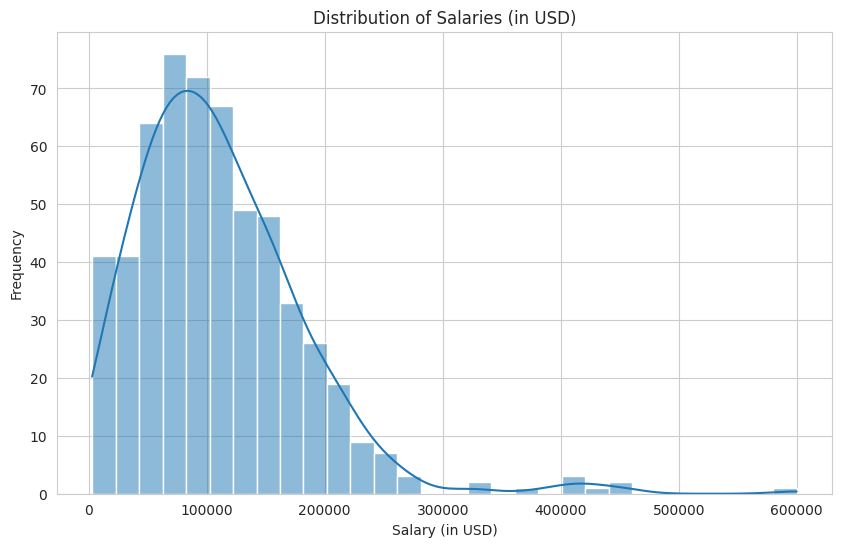

In [ ]:
sns.set_style("whitegrid")

# Distribution of salaries in USD
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Frequency')
plt.show()

**Plotting Salary vs Company Location (Country)**

This graph help to breakdown that Russia providing more salary in USD than any other country followed by US.

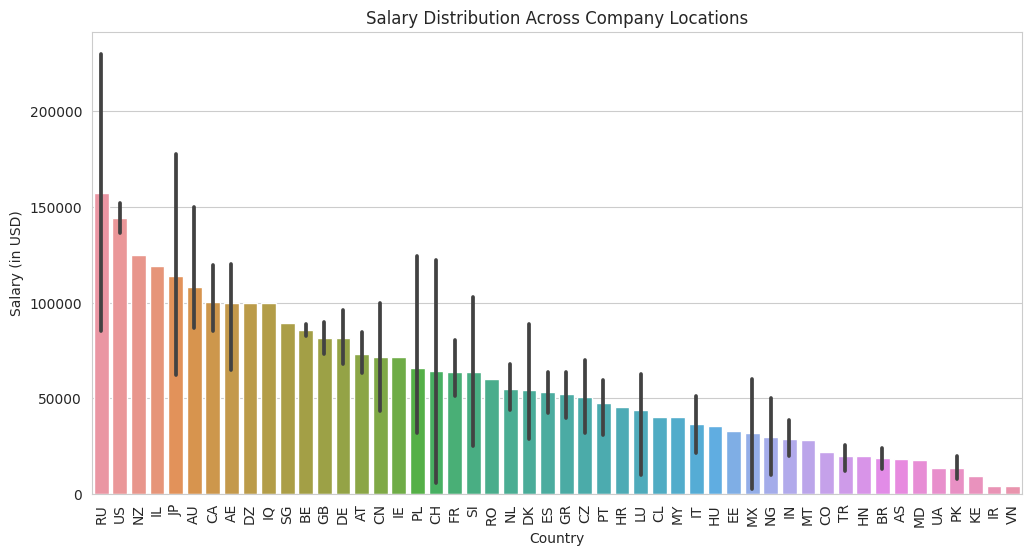

In [ ]:
sorted_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=df, order=sorted_countries)
plt.title('Salary Distribution Across Company Locations')
plt.xlabel('Country')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)
plt.show()

**Number of Jobs by Company Location:**

We observe that a significant number of Jobs in our Data (>50%) are from the United States. However, companies located in Russia only account for 2 Jobs in our data Because of fewer jobs, but much higher salaries, we are getting an incomplete picture, and this may skew our analysis or modeling

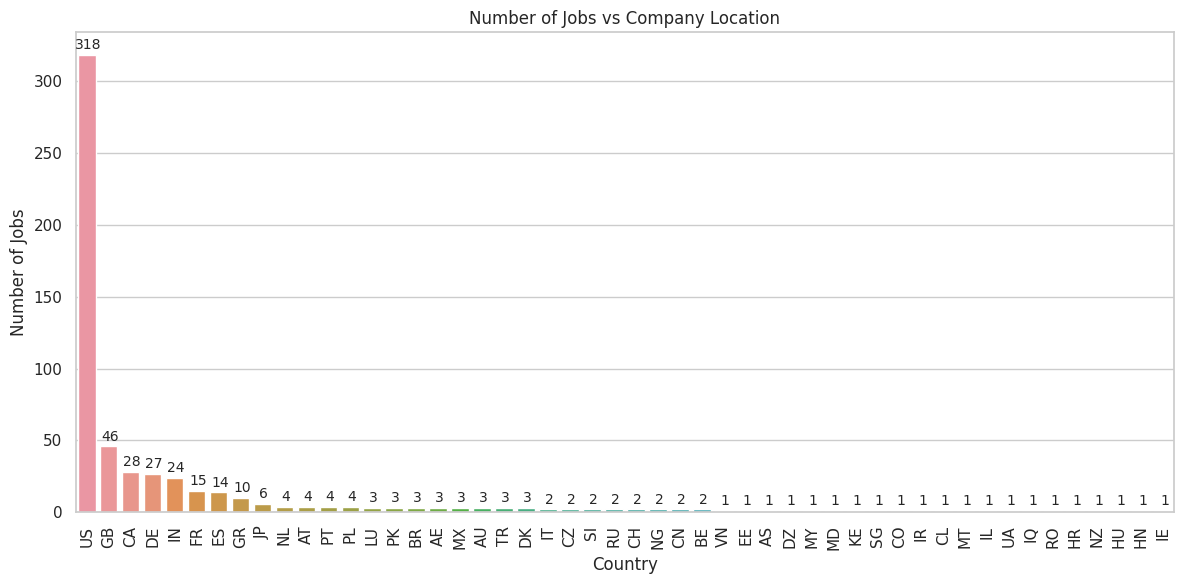

In [ ]:
sorted_country_counts = df['company_location'].value_counts().index #Sort in descending order
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='company_location', data=df, order=sorted_country_counts)

# Add Labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (1, 7),
                textcoords = 'offset points',
               fontsize=10)

plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)
plt.title('Number of Jobs vs Company Location')

# Show the plot
plt.tight_layout()
plt.show()

**Job Salaries based on Job Title:**

Data Analytics Lead, Principal Data Engineer, Financial Data Analyst, Principal Data Scientist, and Director of Data Science are the 5 highest paying Jobs in our Data. This could be due to these being leadership positions, or being in high-paying sectors like Finance. However, as we go along the X-axis on the graph, we can observe a few Jobs that sound similar but seem to have a big discrepancy in salaries. There is also a lot of variance in a few Job titles. This could be due to which countries these Jobs are located, whether they're remote or on-site, as well as other factors

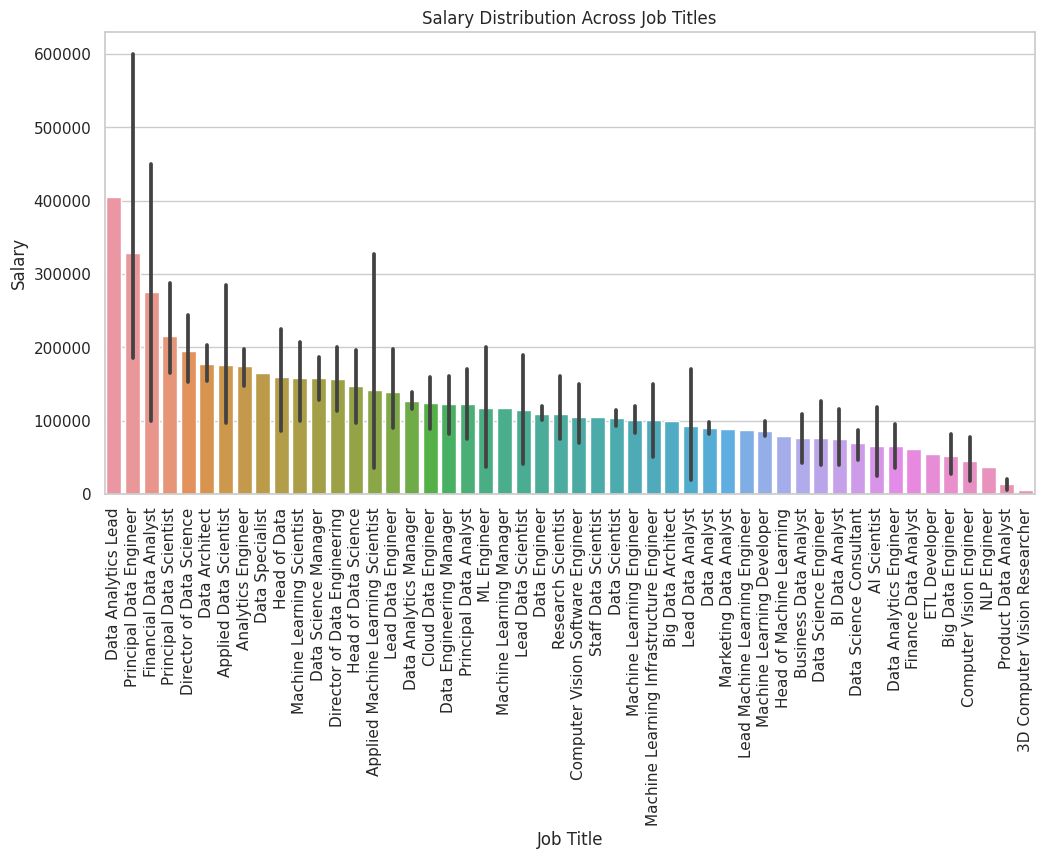

In [ ]:
sorted_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=df, order=sorted_roles)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

**Salary as per company size**

This pie chart shows that majority of the Medium Size company providing more salary than Large and small with 53.3% on the dataset.

In [ ]:
import plotly.express as px
fig = px.pie(df, values="salary_in_usd", names="company_size",
             color_discrete_sequence=px.colors.sequential.RdBu,
             opacity=0.7, hole=0.5)
fig.show()

**Number of Jobs based on Job Title:**

Data Scientist, Data Engineer, and Data Analyst are the most common Job titles, followed by more specialized job titles. This could be because most companies only need Data Scientists, Engineers and Analysts for their Data-related needs, but companies that specialize in Data-related activities or Companies that are more mature in their adoption of Data-driven practices, seek out more specialized roles. However, this is only an assumption that cannot be proven by the current dataset. To support this assumption we would require additional data and need to perform deeper analysis.

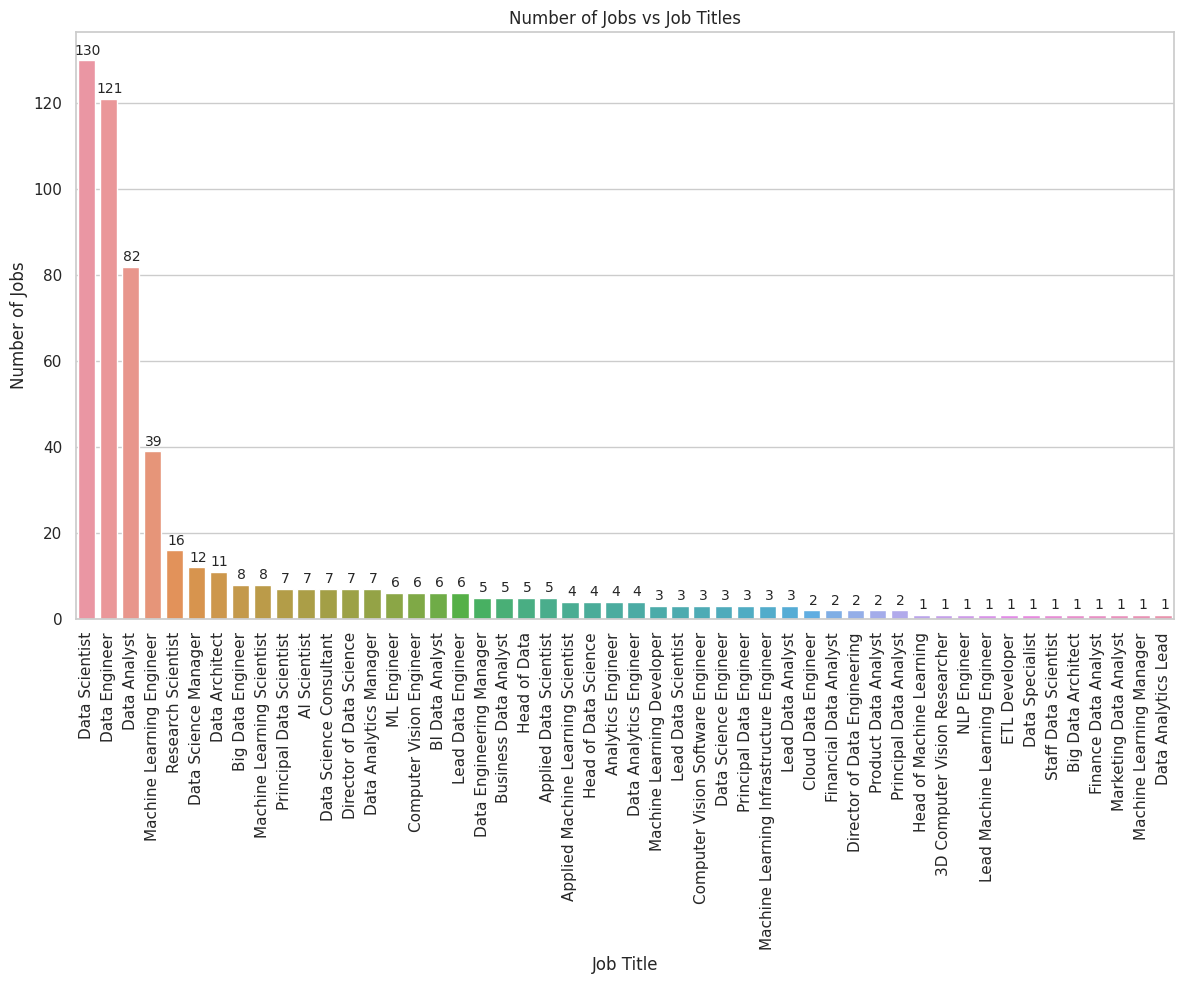

In [ ]:
sorted_jobtype_counts = df['job_title'].value_counts().index
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
ax = sns.countplot(x='job_title', data=df, order=sorted_jobtype_counts)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (1, 7),
                textcoords = 'offset points',
               fontsize=10)

plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)
plt.title('Number of Jobs vs Job Titles')

plt.tight_layout()
plt.show()

**Median Salaries based on Experience Level.**

Not surprisingly, Entry level jobs have the lowest salaries, followed by Mid Level jobs and Senior Level jobs, and Executive Level jobs have the highest salaries

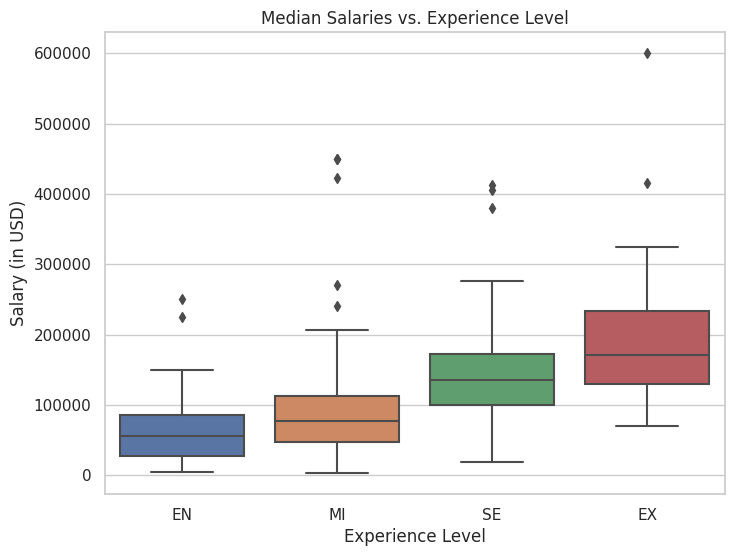

In [ ]:
sorted_exp = ['EN', 'MI', 'SE', 'EX'] #Order by Seniority
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=sorted_exp)
plt.title('Median Salaries vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.show()


**Number of Jobs based on Experience level**

From the graph it is clear that most of the jobs have a Senior level of Experience followed by Middle level and Entry level.

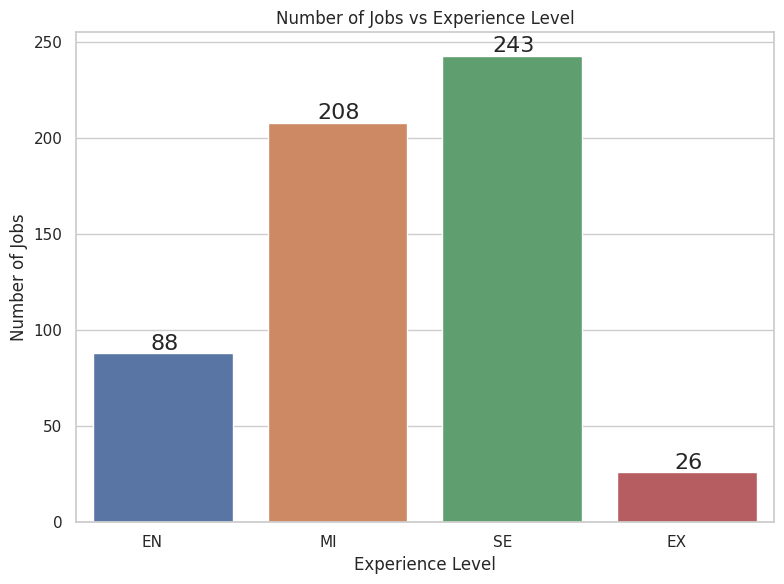

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='experience_level', data=df, order=sorted_exp)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (1, 7),
                textcoords = 'offset points',
               fontsize=16)

plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0, ha="right")
plt.title('Number of Jobs vs Experience Level')

plt.tight_layout()
plt.show()

**Median salaries vs. employment_type**

Number of Jobs based on Experience Level Executive level jobs are the least common, followed by Entry Level jobs. Mid-Level and Senior-Level Jobs account for about 80% of the Jobs in our data.

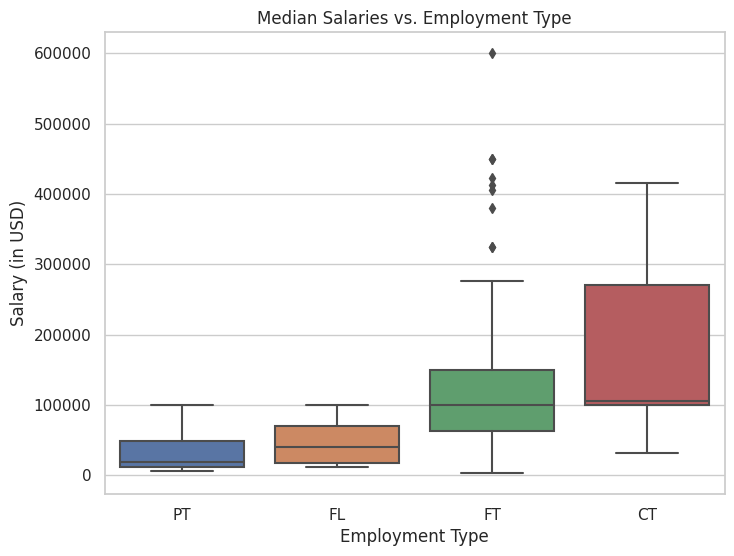

In [ ]:
sorted_emp = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=True).index

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', order=sorted_emp)
plt.title('Median Salaries vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')
plt.show()

**Salary in USD based on experience level**

In the box plot helps us to shows that Experience level of employee has the highest salary range of 200k-250k followed by Senior level employee.

In [ ]:
import plotly.express as px
fig = px.box(df, x="salary_in_usd", y="experience_level")
fig.show()

**Number of Jobs vs Employment Type**

When we break down the number of jobs in the data against the Employment Type, we observe that the vast majority (~95%) of the jobs listed are Full Time jobs.

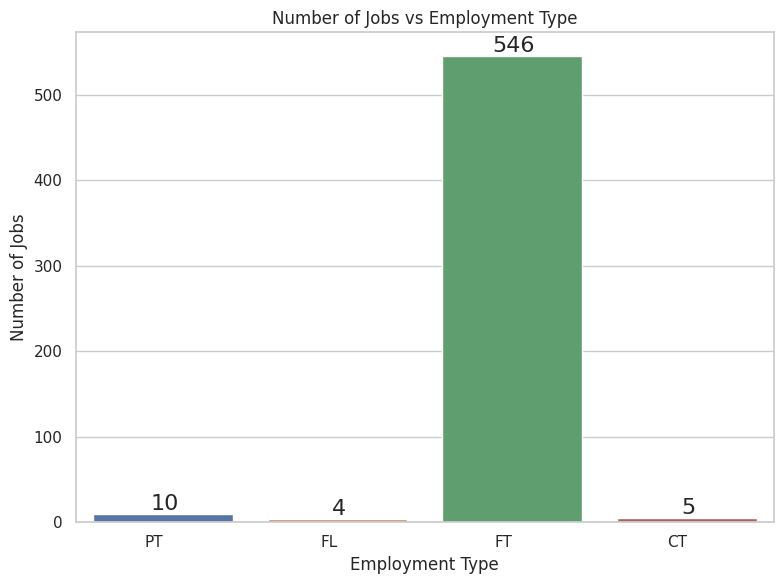

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='employment_type', data=df, order=sorted_emp)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (1, 7),
                textcoords = 'offset points',
               fontsize=16)

plt.xlabel('Employment Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0, ha="right")
plt.title('Number of Jobs vs Employment Type')


plt.tight_layout()
plt.show()

**Median Salaries vs Company Size**

We observe that Small companies (Small businesses or startups) pay the least, while Medium and Large organizations pay on the higher end.

This may be due to larger companies having better resources to pay their employees. There are big outliers for Large companies, and also a wider distribution in salaries as Large organizations may have a lot of employees, and compensation may depend on geographical location of the company, standard of living, etc.

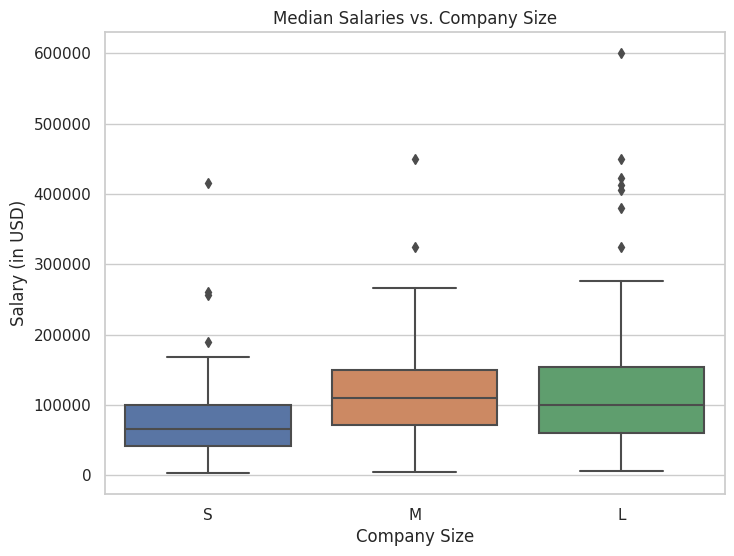

In [ ]:
sorted_size = ['S','M','L']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', order=sorted_size)
plt.title('Median Salaries vs. Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (in USD)')
plt.show()

**Number of Jobs vs Company Size**

51% of the jobs in the data are employed at Medium sized companies. Out of the remaining 50%, Large corporations amount for more than double the jobs than Small businesses.

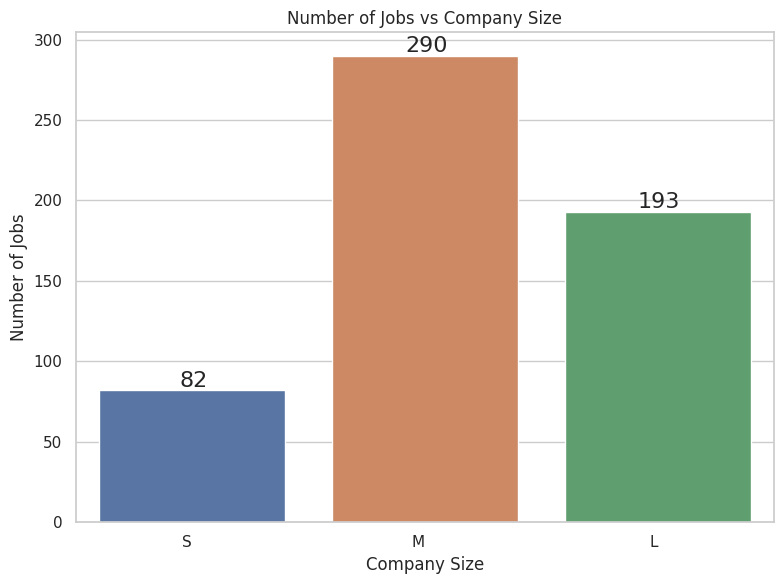

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='company_size', data=df, order=sorted_size)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (1, 7),
                textcoords = 'offset points',
               fontsize=16)

plt.xlabel('Company Size')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0, ha="right")
plt.title('Number of Jobs vs Company Size')

plt.tight_layout()
plt.show()

**Data preprocessing (2)**

i)OneHotEncoding to categorical features.

ii)Normalization

In [ ]:
threshold = 10

residence_counts = df['employee_residence'].value_counts()
residence_others = residence_counts[residence_counts < threshold].index
df['employee_residence'] = df['employee_residence'].replace(residence_others, 'Other')

location_counts = df['company_location'].value_counts()
location_others = location_counts[location_counts < threshold].index
df['company_location'] = df['company_location'].replace(location_others, 'Other')

job_title_counts = df['job_title'].value_counts()
job_title_others = job_title_counts[job_title_counts < threshold].index
df['job_title'] = df['job_title'].replace(job_title_others, 'Other')

# One-hot Encoding
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'employee_residence', 'company_location', 'company_size', 'job_title'], drop_first=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['salary_in_usd', 'remote_ratio']] = scaler.fit_transform(df_encoded[['salary_in_usd', 'remote_ratio']])

df_encoded.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,employee_residence_DE,...,company_location_US,company_size_M,company_size_S,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Other,job_title_Research Scientist
0,2020,-0.426180,-1.710815,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2020,2.068630,-1.710815,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2020,-0.021966,-0.487257,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2020,-1.254701,-1.710815,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2020,0.545437,-0.487257,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


**Correlation Matrix Heatmap**

In this correlation matrix,the major correlation are

*Work year and Job title

*Employee residence and company location

*salary in USD and Experience level

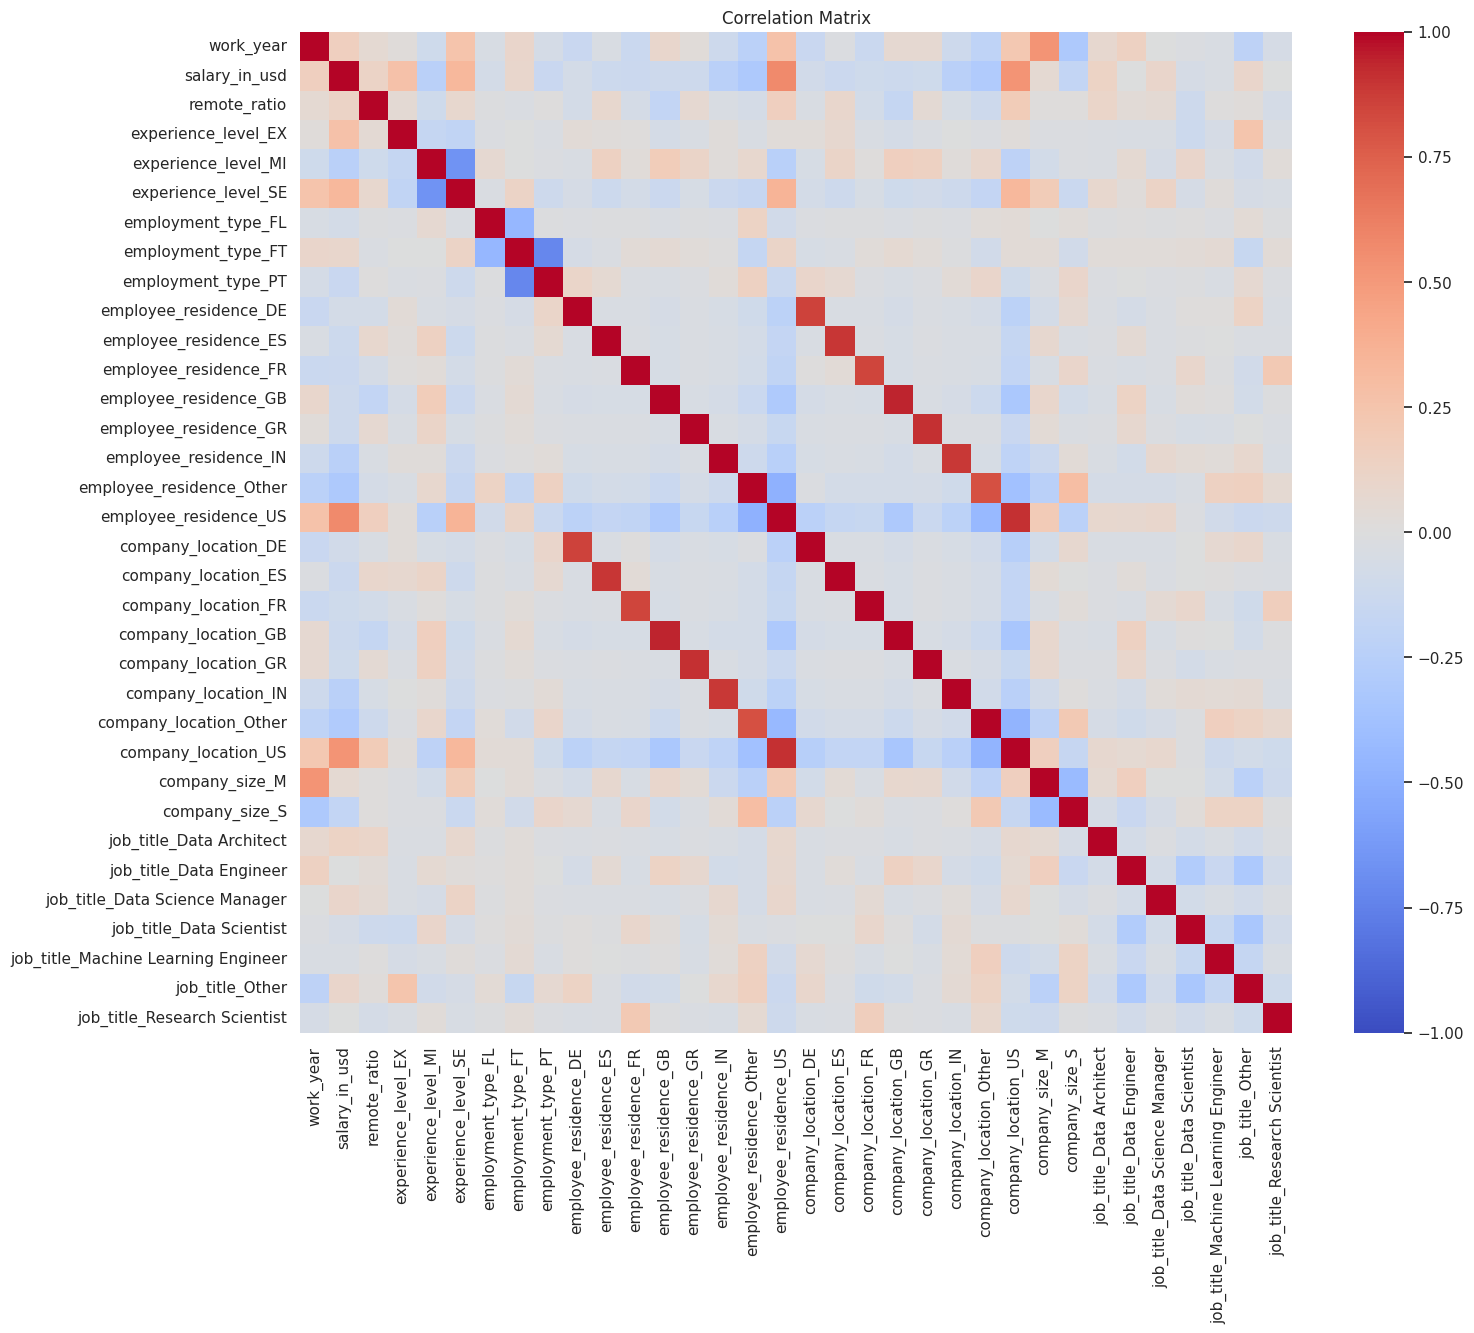

In [ ]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(16, 13))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Data Model Building**

i)Train test split

ii)LinearRegression Model

iii)Prediction

iv)Evaluation model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

# Splitting the data
X = df_encoded.drop('salary_in_usd', axis=1)
y = df_encoded['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Model Evaluation
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_rmse, test_rmse, train_mae, test_mae

(0.6776595752484057,
 0.7314717029420592,
 0.4627211976532526,
 0.46151208953100264)

**Using the following model :**

i)RandomForestRegressor
ii)GradientBoostingRegressor

In both these models, the Test RMSE is significantly higher than Train RMSE, which indicates severe overfitting. These models need to be tweaked to get better performance. For now, we are discarding these models for the simpler, but better performing Linear Regression mode

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

#Model Training
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Predictions
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)
y_pred_gb_train = gb.predict(X_train)
y_pred_gb_test = gb.predict(X_test)

# Model Evaluation
rf_train_rmse = mean_squared_error(y_train, y_pred_rf_train, squared=False)
rf_test_rmse = mean_squared_error(y_test, y_pred_rf_test, squared=False)
rf_train_mae = mean_absolute_error(y_train, y_pred_rf_train)
rf_test_mae = mean_absolute_error(y_test, y_pred_rf_test)

gb_train_rmse = mean_squared_error(y_train, y_pred_gb_train, squared=False)
gb_test_rmse = mean_squared_error(y_test, y_pred_gb_test, squared=False)
gb_train_mae = mean_absolute_error(y_train, y_pred_gb_train)
gb_test_mae = mean_absolute_error(y_test, y_pred_gb_test)

print('rf_train_rmse:',rf_train_rmse)

(rf_train_rmse, rf_test_rmse, rf_train_mae, rf_test_mae), (gb_train_rmse, gb_test_rmse, gb_train_mae, gb_test_mae)

rf_train_rmse: 0.46384700602265205


((0.46384700602265205,
  0.7419236191072428,
  0.29347773038337793,
  0.43777438278303915),
 (0.5941441887234992,
  0.7237079289364042,
  0.4021992184392206,
  0.440993843656205))

**Linear Regression: Predicted vs Actual Salaries**

(-3.0, 3.0)

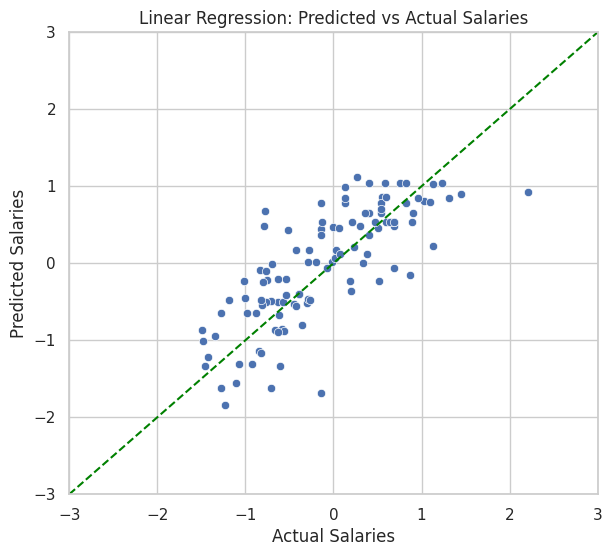

In [ ]:
plt.figure(figsize=(15, 6))

# Plotting Predicted vs Actual Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([-3, 3], [-3, 3], color='green', linestyle='--')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Linear Regression: Predicted vs Actual Salaries')
plt.xlim([-3, 3])
plt.ylim([-3, 3])

**Conclusion:**

From the Exploratory Data Analysis, I have concluded that Salary in USD of the employees is dependent upon the following factors:

    1.Job title
    2.Experience level
    3.Work year

Employees with greater year of experience ,having job title such as Data architect,Data science manager,Data engineer,Research scientist,Data Scientist, Machine Learning Engineer and Data Analyst are likely to have a higher salary.

With Machine Learning model, I have used regressor models-From the scatterplot of (Linear Regression: Predicted vs Actual Salaries). The Blue dots closest to the green line which clearly indicates that the most accurate predictions, while the dots furthest away from the green line shows the least accurate predictions.